In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score


No. of Patient
Sugar Level Blood
Age
Gender
Creatinine ratio(Cr)
Body Mass Index (BMI)
Urea
Cholesterol (Chol)
Fasting lipid profile {
    LDL
    VLDL
    Triglycerides(TG) 
    HDL Cholesterol
    HBA1C
    Class (the patient's diabetes disease class may be Diabetic, Non-Diabetic, or Predict-Diabetic)
    }

In [2]:
diabetes_dataset = pd.read_csv("C:/Users/jahna/OneDrive/Pictures/Camera Roll/project/Dataset of Diabetes .csv")

In [3]:
diabetes_dataset.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [4]:
diabetes_dataset.shape

(1000, 14)

In [5]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [6]:
diabetes_dataset.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [7]:
diabetes_dataset['CLASS'].value_counts()

Y     840
N     102
P      53
Y       4
N       1
Name: CLASS, dtype: int64

In [8]:
diabetes_dataset['CLASS'].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [9]:
diabetes_dataset['CLASS'].replace({'Y':0,'Y ':0,'N':1,'N ':1,'P':2}, inplace=True)

In [10]:
diabetes_dataset['CLASS'].value_counts()

0    844
1    103
2     53
Name: CLASS, dtype: int64

In [11]:
diabetes_dataset['Gender'].value_counts()

M    565
F    434
f      1
Name: Gender, dtype: int64

In [12]:
diabetes_dataset['Gender']=diabetes_dataset['Gender'].map({'M':0,'F':1,'f':1})

In [13]:
diabetes_dataset['Gender'].value_counts()

0    565
1    435
Name: Gender, dtype: int64

In [14]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   int64  
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   int64  
dtypes: float64(8), int64(6)
memory usage: 109.5 KB


In [15]:
%matplotlib inline

In [16]:
import matplotlib.pyplot as plt

AttributeError: 'numpy.ndarray' object has no attribute 'plt'

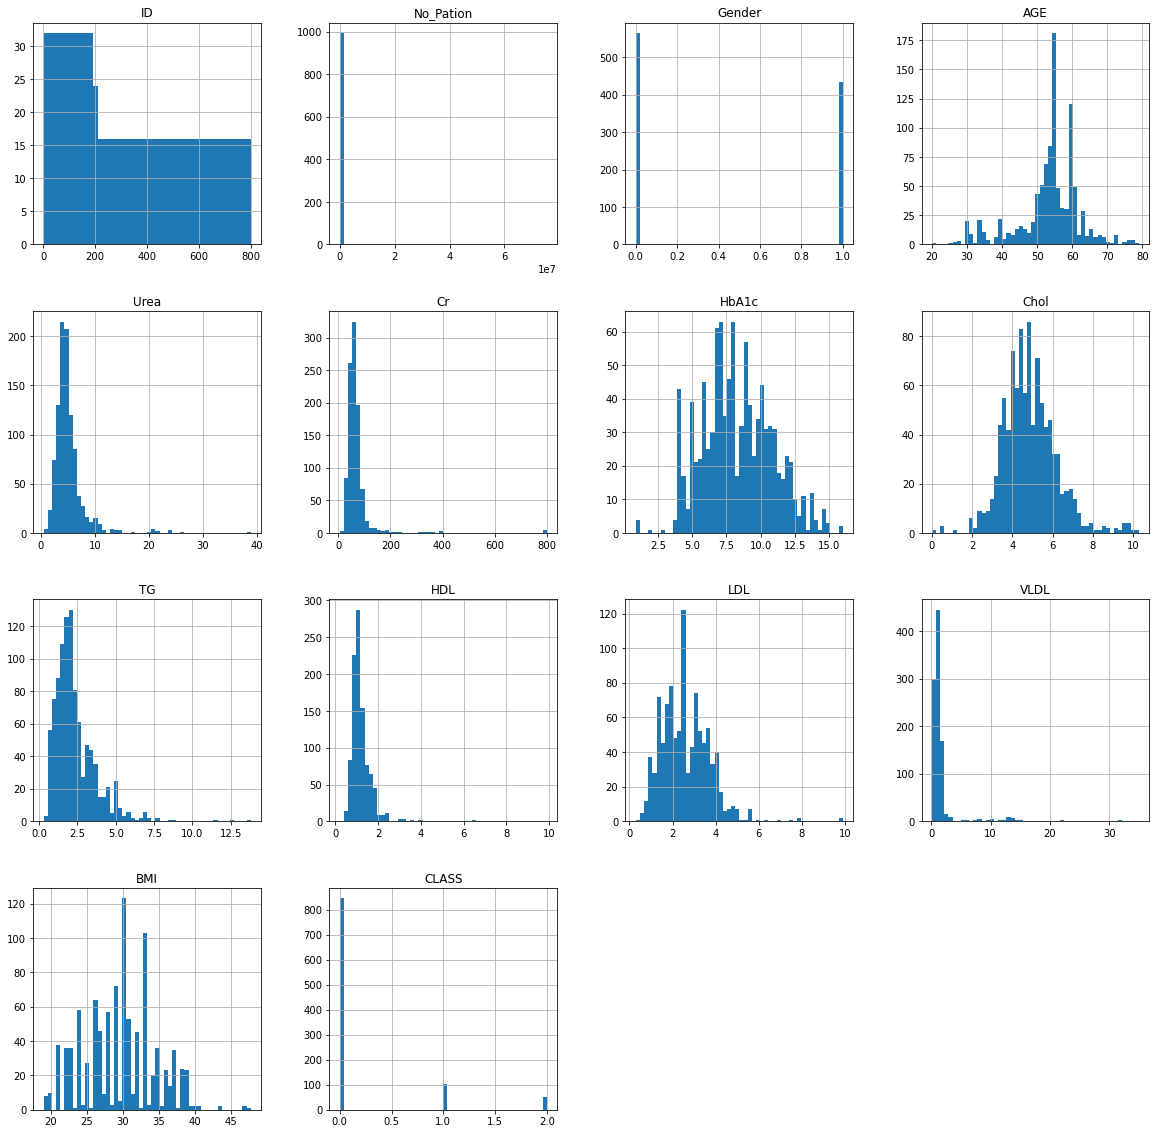

In [17]:
diabetes_dataset.hist(bins=50,figsize=(20,20)).plt

In [18]:
x=diabetes_dataset.iloc[:,:13]
y=diabetes_dataset.iloc[:,13]

In [19]:
from sklearn import preprocessing
#scaler = preprocessing.StandardScaler()
#scaler
#x.shape

In [20]:
#x = scaler.fit_transform(x)

In [21]:
#Feature Selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier()
rf.fit(x,y)

RandomForestClassifier()

In [22]:
rf.feature_importances_

array([0.03621641, 0.04678779, 0.00758471, 0.1313776 , 0.01947078,
       0.02005837, 0.30115344, 0.06011931, 0.04369266, 0.01550921,
       0.02420163, 0.03501786, 0.25881023])

In [23]:
from sklearn.feature_selection import SelectFromModel


feature_selector = SelectFromModel(rf, threshold=0.0314)
feature_selector.fit(x, y)

SelectFromModel(estimator=RandomForestClassifier(), threshold=0.0314)

In [24]:
# Get selected feature indices
selected_feature_indices = feature_selector.get_support(indices=True)
selected_feature_indices

array([ 1,  3,  6,  7,  8, 11, 12], dtype=int64)

In [25]:
# Get selected feature names
x1 = x.copy()
x1=x1.drop("ID",axis=1)


In [26]:
x1=x1.drop("Urea",axis=1)
x1=x1.drop("HDL",axis=1)
#x1=x1.drop("Cr",axis=1)
#x1=x1.drop("LDL",axis=1)

In [27]:
x1

,No_Pation,Gender,AGE,Cr,HbA1c,Chol,TG,LDL,VLDL,BMI
0,17975,1,50,46,4.9,4.2,0.9,1.4,0.5,24.0
1,34221,0,26,62,4.9,3.7,1.4,2.1,0.6,23.0
2,47975,1,50,46,4.9,4.2,0.9,1.4,0.5,24.0
3,87656,1,50,46,4.9,4.2,0.9,1.4,0.5,24.0
4,34223,0,33,46,4.9,4.9,1.0,2.0,0.4,21.0
...,...,...,...,...,...,...,...,...,...,...
995,454317,0,71,97,7.0,7.5,1.7,1.8,0.6,30.0
996,876534,0,31,60,12.3,4.1,2.2,2.4,15.4,37.2
997,87654,0,30,81,6.7,4.1,1.1,2.4,8.1,27.4
998,24004,0,38,59,6.7,5.3,2.0,2.9,14.0,40.5


In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size = 0.2,random_state = 42)

In [29]:
#ADA Boost
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

c1 = AdaBoostClassifier(n_estimators=50,learning_rate=1)
# Train Adaboost Classifer
model1 = c1.fit(x_train, y_train)

#Predict the response for test dataset
y_pred1 = model1.predict(x_test)
#Model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.955


In [30]:
#Random forest

c2 = RandomForestClassifier()
model2 = c2.fit(x_train, y_train)

#Predict the response for test dataset
y_pred2 = model2.predict(x_test)
#Model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.995


In [31]:
#ADA Boost
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

c1 = AdaBoostClassifier(n_estimators=50,learning_rate=1)
# Train Adaboost Classifer
model1 = c1.fit(x_train, y_train)

#Predict the response for test dataset
y_pred1 = model1.predict(x_test)
#Model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.955


In [32]:
#Random forest

c2 = RandomForestClassifier()
model2 = c2.fit(x_train, y_train)

#Predict the response for test dataset
y_pred2 = model2.predict(x_test)
#Model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.985


In [33]:
#LightGradient Boost
from lightgbm import LGBMClassifier

c3 = LGBMClassifier()
model3 = c3.fit(x_train, y_train)
 
# Predicting the Target variable
y_pred3 = model3.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))

Accuracy: 0.985


In [34]:
#logistic regression


from sklearn.linear_model import LogisticRegression
c4 = LogisticRegression(random_state=0)
model4 = c4.fit(x_train, y_train)

y_pred4 = model4.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred4))

Accuracy: 0.86


In [ ]:
#SVM

from sklearn.svm import SVC
c5 = SVC(C=.1, kernel='linear', gamma=1)
model5 = c5.fit(x_train, y_train)
 
y_pred5 = model5.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred5))

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have predictions and true labels
cm_c1 = confusion_matrix(y_test, y_pred1)
cm_c2 = confusion_matrix(y_test, y_pred2)
cm_c3 = confusion_matrix(y_test, y_pred3)
cm_c4 = confusion_matrix(y_test, y_pred4)
cm_c5 = confusion_matrix(y_test, y_pred5)
# Display the confusion matrix
plt.title("ADA Boost")
sns.heatmap(cm_c1, annot=True, fmt='d', cmap='Blues')
plt.show()

plt.title("Random forest")
sns.heatmap(cm_c2, annot=True, fmt='d', cmap='Blues')
plt.show()

plt.title("Light Gradient Boost")
sns.heatmap(cm_c3, annot=True, fmt='d', cmap='Blues')
plt.show()

plt.title("Logistic regression")
sns.heatmap(cm_c4, annot=True, fmt='d', cmap='Blues')
plt.show()

plt.title("SVM")
sns.heatmap(cm_c5, annot=True, fmt='d', cmap='Blues')
plt.show()

In [ ]:
#Ensemble Learning

estimators = []

estimators.append(('ADA boost',c1))
estimators.append(('Random forest',c2))
estimators.append(('LG Boost',c3))
estimators.append(('Logistic regression',c4))
estimators.append(('SVM',c5))

estimators

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score,KFold

e = VotingClassifier(estimators,voting = 'hard')
e.fit(x_train,y_train)
y_pred = e.predict(x_test)

cm = confusion_matrix(y_test,y_pred)


In [ ]:
plt.title("Voting classifier")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Accuracy of ADA Boost Classifier :",metrics.accuracy_score(y_test, y_pred1))
print("Accuracy of random forest Classifier :",metrics.accuracy_score(y_test, y_pred2))
print("Accuracy of light Boost Classifier :",metrics.accuracy_score(y_test, y_pred3))
print("Accuracy of Logistic Regression :",metrics.accuracy_score(y_test, y_pred4))
print("Accuracy of Support vector Machine :",metrics.accuracy_score(y_test, y_pred5))

In [ ]:
input_data = (17975,1,50,46,4.9,4.2,0.9,1.4,0.5,24)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = e.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 1):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

In [ ]:
import pickle

In [ ]:
filename = 'diabetes_model1.sav'
pickle.dump(e, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open('diabetes_model1.sav', 'rb'))

In [ ]:
input_data = (17975,1,50,46,4.9,4.2,0.9,1.4,0.5,24)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = e.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 1):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

In [ ]:
for column in x1.columns:
    print(column)